In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Optuna fitting

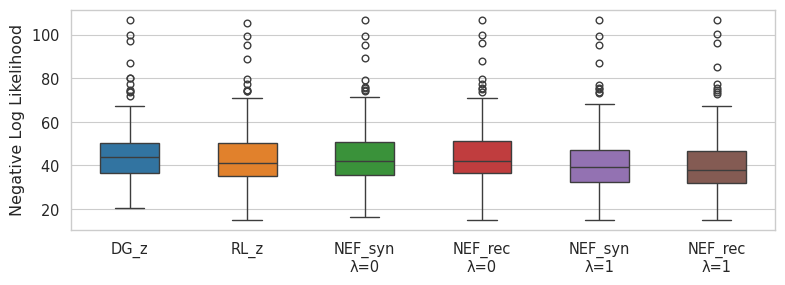

In [5]:
dg_z = pd.read_pickle("data/DG_z_jiang_mar7_performance.pkl")
rl_z = pd.read_pickle("data/RL_z_jiang_mar7_performance.pkl")
nef_rl_l0 = pd.read_pickle("data/NEF_RL_jiang_mar11_performance.pkl")
nef_wm_l0 = pd.read_pickle("data/NEF_WM_jiang_mar11_performance.pkl")
nef_rl_l1 = pd.read_pickle("data/NEF_RL_jiang_mar13_performance.pkl")
nef_wm_l1 = pd.read_pickle("data/NEF_WM_jiang_mar14_performance.pkl")
nef_rl_l0['type'] = "NEF_syn\nλ=0"
nef_wm_l0['type'] = "NEF_rec\nλ=0"
nef_rl_l1['type'] = "NEF_syn\nλ=1"
nef_wm_l1['type'] = "NEF_rec\nλ=1"
combined = pd.concat([dg_z, rl_z, nef_rl_l0, nef_wm_l0, nef_rl_l1, nef_wm_l1], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:6], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='Negative Log Likelihood') # 'Loss\n'+
    plt.tight_layout()
    fig.savefig("plots/jiang_performance.jpg", dpi=600)

# Compare parameters

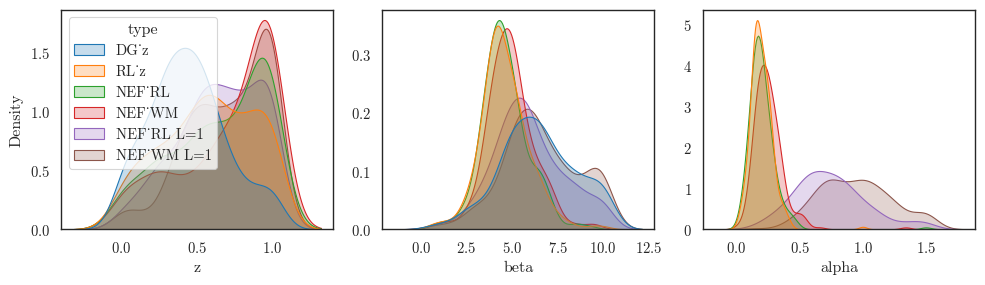

In [18]:
dg_z = pd.read_pickle("data/DG_z_jiang_mar7_params.pkl")
rl_z = pd.read_pickle("data/RL_z_jiang_mar7_params.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_jiang_mar11_params.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_jiang_mar11_params.pkl")
nef_rl_l1 = pd.read_pickle("data/NEF_RL_jiang_mar13_params.pkl")
nef_rl_l1['type'] = "NEF_RL L=1"
nef_wm_l1 = pd.read_pickle("data/NEF_WM_jiang_mar14_params.pkl")
nef_wm_l1['type'] = "NEF_WM L=1"
combined = pd.concat([dg_z, rl_z, nef_rl, nef_wm, nef_rl_l1, nef_wm_l1], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
sns.kdeplot(combined, x='z', hue='type', ax=axes[0], palette=palette[:6], fill=True, common_norm=False)
sns.kdeplot(combined, x='beta', hue='type', ax=axes[1], palette=palette[:6], fill=True, common_norm=False)
sns.kdeplot(combined, x='alpha', hue='type', ax=axes[2], palette=palette[:6], fill=True, common_norm=False)
# sns.histplot(combined, x='lambda', hue='type', ax=axes[3], palette=palette[:6], fill=True, common_norm=False)
axes[1].set(ylabel=None)
axes[2].set(ylabel=None)
axes[1].get_legend().remove()
axes[2].get_legend().remove()
# axes[3].set(ylabel=None)
plt.tight_layout()

# subplots for presentation

/tmp/ipykernel_594186/2771647413.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:5], notch=False, width=0.5)


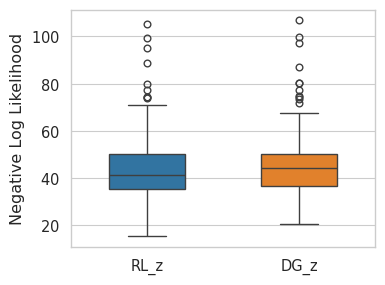

In [22]:
dg_z = pd.read_pickle("data/DG_z_jiang_mar7_performance.pkl")
rl_z = pd.read_pickle("data/RL_z_jiang_mar7_performance.pkl")
combined = pd.concat([rl_z, dg_z], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:5], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='Negative Log Likelihood') # 'Loss\n'+
    plt.tight_layout()
    fig.savefig("plots/jiang_performance_subset1.jpg", dpi=600)